# Исследование продаж компьютерных игр.

### О проекте   
Задача:  
найти из открытых источников исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы и выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  

### Основные этапы

Шаг 1. Ознакомиться с данными и изучить общую информацию
 
Шаг 2. Подготовить данные 

- Замените названия столбцов (приведите к нижнему регистру);  
- Преобразуйте данные в нужные типы.  
- Обработайте пропуски при необходимости:  
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

Шаг 3. Провести исследовательский анализ данных  

- Определить, сколько игр выпускалось в разные годы и важны ли данные за все периоды.
- Посмотреть, как менялись продажи по платформам.
- Определить какие платформы лидируют по продажам.
- Определить, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Соотнести выводы с продажами игр на других платформах.
- Узнать какой жанр наиболее прибыльный.

Шаг 4. Составить портрет пользователя каждого региона 

- Самые популярные платформы (топ-5)
- Самые популярные жанры (топ-5)
- Узнать влияет ли рейтинг ESRB на продажи в отдельном регионе  

Шаг 5. Проверить гипотезы 

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.  


Шаг 6. Общий вывод  

### Откроем файл с данными и изучим общую информацию. 

#### Загрузим данные из файла в датафрейм.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

import warnings
#убираем системные предупреждения
warnings.filterwarnings('ignore')
#настраиваем отображение колонок (полностью)
pd.set_option('display.max_columns', None)
#настраиваем отображение формата значений
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

#### Изучим общую информацию о полученном датафреймe.

In [3]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


Игры представлены начиная с 1980 года. В столбце critic_score оценки выставлены по 100-бальной шкале.

### Предобработка данных

- Заменим названия столбцов (приведём к нижнему регистру)

In [6]:
data.columns = data.columns.str.lower()

In [7]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

- Преобразуем данные в нужные типы.   
в столбце year_of_release указан год выпуска -  целочисленное значение, заменим на int после обработки пропусков  
в столбце user_score указан рейтинг пользователей, но почему то отбражается тип данных object.
рассмотрим далее и заменим тип данных на float



- Обработаем пропуски при необходимости:

In [8]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,40.100000


1. Пропуски в основном в столбцах с различными рейтингами, очень похоже что рейтинге критиков и пользователей значения отсутствует до определенного года выпуска игр. Заполнить их не удастся.  
Однако в столбце с рейтингом ESRB, пропуски могут быть вызваны тем что этот рейтинг предназначен для маркировки игр для США и Канады. И логично, что для других регионов он не заполняется. Поставим заглушку Unknown и выведем ее при анализе.


In [10]:
data['rating'] = data['rating'].fillna('unknown')

2. В столбце имя и жанр всего по два пропуска. Рассмотрим их отдельно

In [11]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,unknown
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,unknown


In [12]:
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,unknown
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,unknown


Это одни и те же строки, удалим их, т.к. данных для анализа в них немного

In [13]:
data = data.dropna(subset=['name'])

In [14]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим что встречается аббревиатура 'tbd', что значит "подлежит уточнению" в столбце с оценкой пользователей, поэтому тип данных отоброжается не корректно. 
Заменим значение 'tbd' на NaN для дальнейшей обработки и изменения типа данных

In [15]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [16]:
data['user_score'] = data['user_score'].astype('float')

В столбце year_of_release заполнить пропуски мы не сможем, т.к. объём не большой, мы можем удалить эти строки для преобразования типа данных и дальнейшей обработки информации

In [17]:
data = data.dropna(subset=['year_of_release'])

In [18]:
data['year_of_release'].isna().sum()

0

In [19]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


Избавлись от ненужных пропусков.  
- Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [21]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [22]:
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54


Проверим на дубликаты:


In [23]:
data.duplicated().sum() #проверка явных дубликатов

0

In [24]:
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.00,5.50,E,2.56
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.00,5.50,E,0.01


удалим из датафрейма строки с дубликатами в столбце 'name', 'platform', 'year_of_release', оставив только первую: будем считать, что верные значения для «дубликатов» встречаются первыми в таблице

In [25]:
data = data.drop_duplicates(subset=['name', 'platform','year_of_release'], keep='first')

In [26]:
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


### Вывод  
На данном этапе мы проделали следующее:
1. Ознакомились с данными.  
2. Привели типы данных к нужным нам для дальнейшего исследования. 
3. Избавлись от ненужных пропусков и дубликатов
4. Добавили столбец с общей выручкой каждой игры.  

## Проведем исследовательский анализ данных

- Посмотрим, сколько игр выпускалось в разные годы и важны ли данные за все периоды

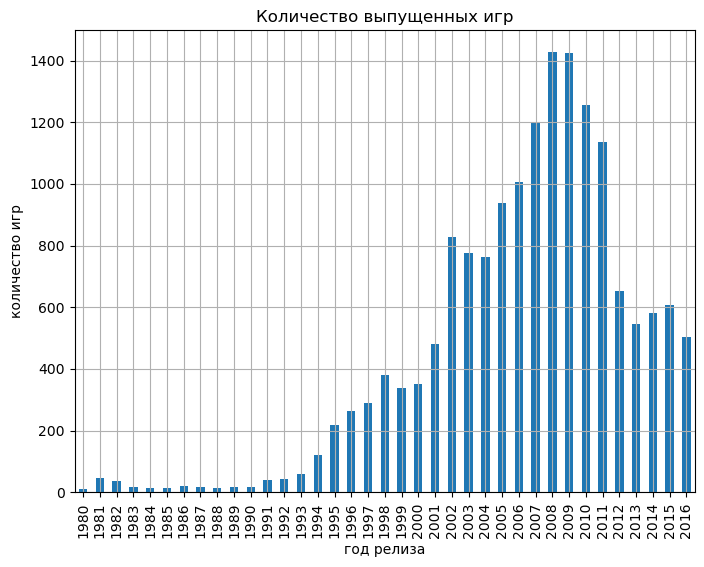

In [27]:
data.groupby('year_of_release')['name'].count().plot.bar( x = 'year_of_release', y = 'count_of_games', grid=True, title='Количество выпущенных игр',
                   figsize=(8,6)).set(xlabel='год релиза', ylabel='количество игр');

Видим что пик выхода новых игр приходися на 2008-2009 года, заметно резкое снижение рынка начиная с 2012, после которого рынок больше не растет

- Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Узнаем за какой характерный срок появляются новые и исчезают старые платформы


In [28]:
platform_year = data.groupby('platform')['total_sales'].agg(['count', 'sum']
                                    ).sort_values(by='sum', ascending = False).reset_index()
platform_year.columns = ['platform', 'game_of_platform_count', 'game_of_platform_sales' ]
platform_year

,platform,game_of_platform_count,game_of_platform_sales
0,PS2,2127,"1,233.56"
1,X360,1232,961.24
2,PS3,1305,931.33
3,Wii,1286,891.18
4,DS,2121,802.78
5,PS,1190,727.58
6,PS4,392,314.14
7,GBA,811,312.88
8,PSP,1193,289.53
9,3DS,512,257.81


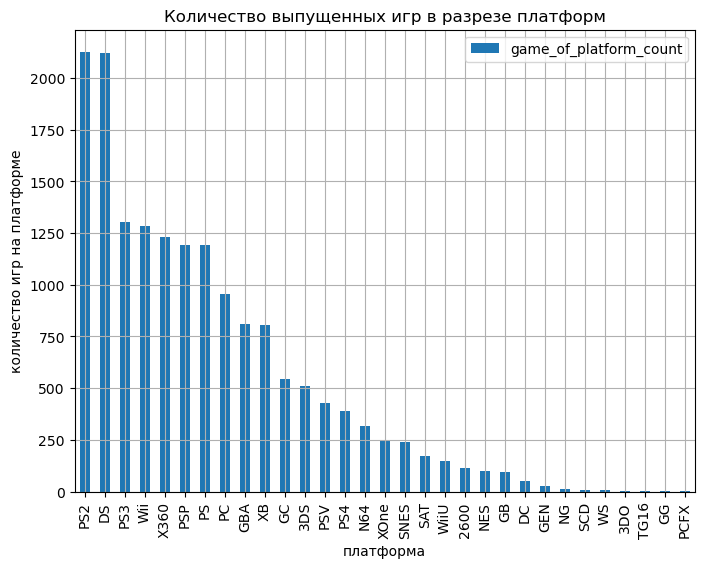

In [29]:
#количество игр на платформах
platform_year.sort_values(by =  'game_of_platform_count', ascending= False).plot.bar(
                    x = 'platform', y = 'game_of_platform_count', grid=True, 
                    title='Количество выпущенных игр в разрезе платформ',
                    figsize=(8,6)).set(xlabel='платформа', ylabel='количество игр на платформе');

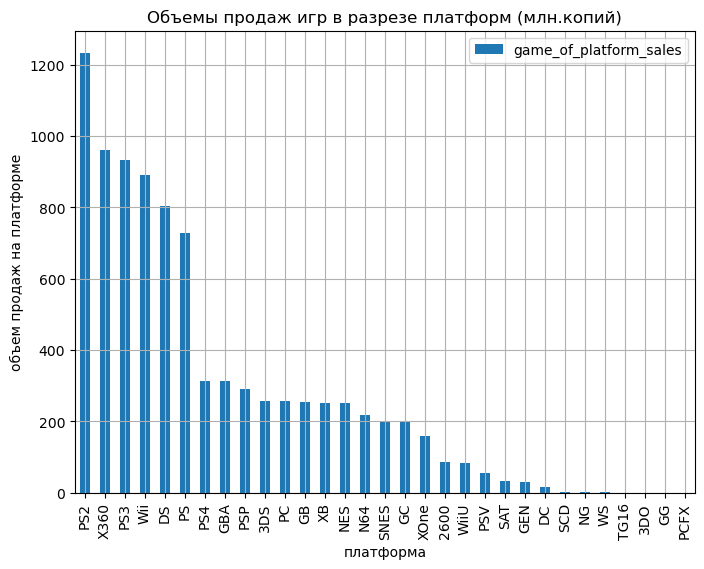

In [30]:
#объемы продаж по платформам
platform_year.plot.bar(
                    x = 'platform', y = 'game_of_platform_sales', grid=True, 
                    title='Объемы продаж игр в разрезе платформ (млн.копий)',
                    figsize=(8,6)).set(xlabel='платформа', ylabel='объем продаж на платформе');

Посмотрим на объемы продаж в процентном соотношении:

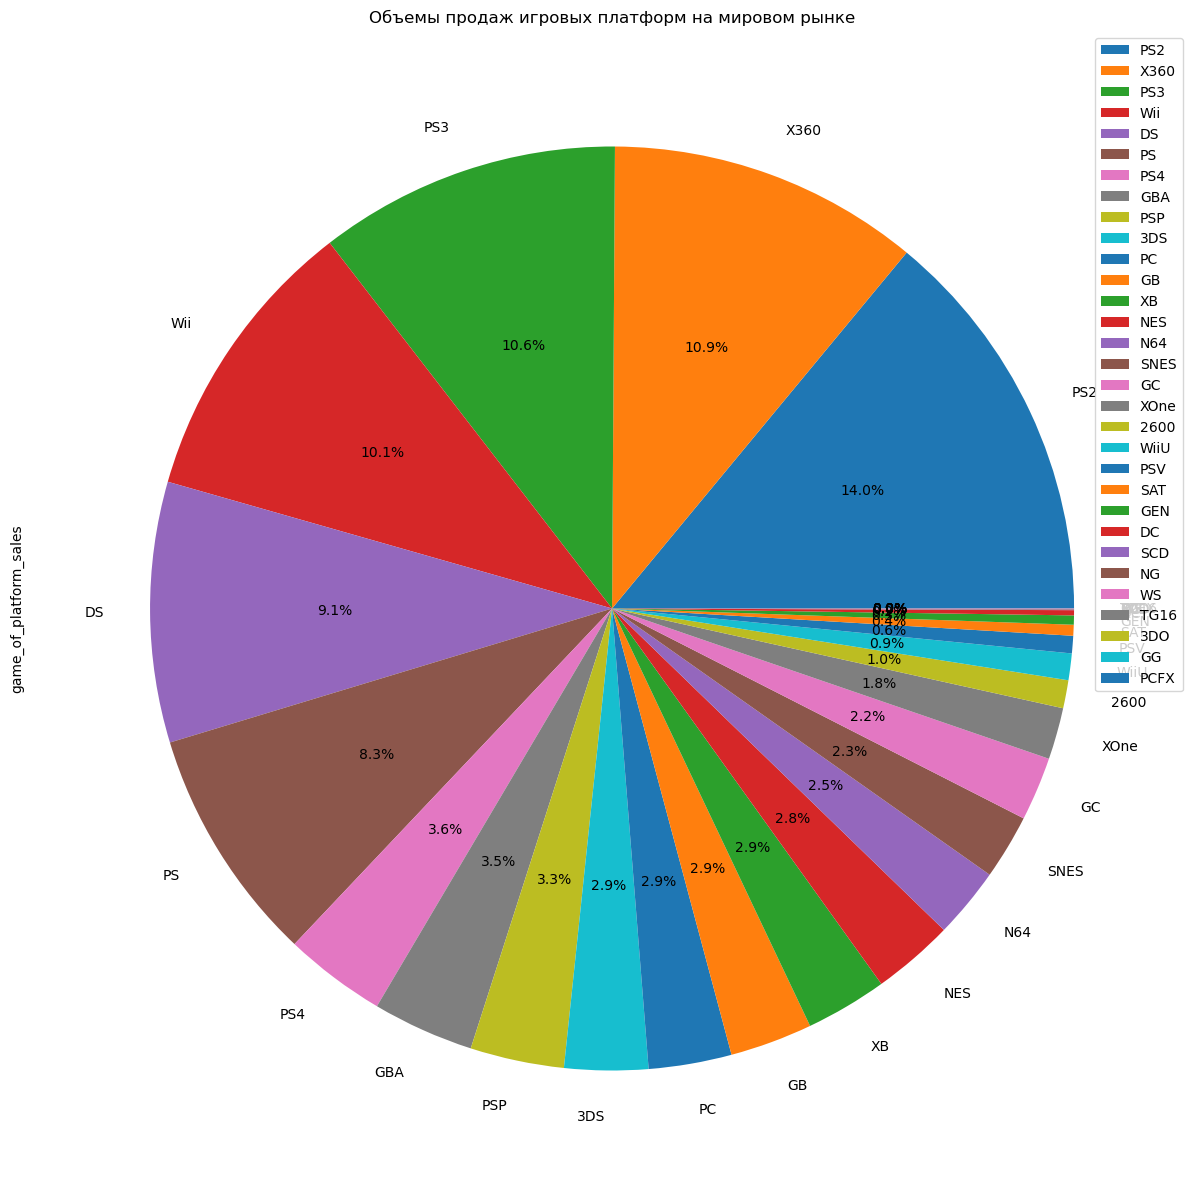

In [31]:
platform_year.plot(kind = 'pie', y ='game_of_platform_sales', autopct='%1.1f%%', figsize= (15,15),
                         title = 'Объемы продаж игровых платформ на мировом рынке', labels = platform_year['platform']
                         );

**На графике видно 6 основных платформ - лидеров продаж. Построим для них графики распределение по годам начнем с платформы PS**

- Рассмотрим подробнее топ-5 платформ:

In [32]:
# топ-5 по объемам продаж:
top_platforms = platform_year.head(5)['platform']
top_platforms

0     PS2
1    X360
2     PS3
3     Wii
4      DS
Name: platform, dtype: object

In [33]:
#сгруппируем топ платформ по годам релиза:
top = data.query('platform in @top_platforms').pivot_table(
                       index='year_of_release', columns = 'platform', 
                       values = 'total_sales', aggfunc = 'sum')
top

platform,DS,PS2,PS3,Wii,X360
year_of_release,,,,,
1985,0.02,NaN,NaN,NaN,NaN
2000,NaN,39.17,NaN,NaN,NaN
2001,NaN,166.43,NaN,NaN,NaN
2002,NaN,205.38,NaN,NaN,NaN
2003,NaN,184.31,NaN,NaN,NaN
2004,17.27,211.81,NaN,NaN,NaN
2005,130.14,160.66,NaN,NaN,8.25
2006,119.81,103.42,20.96,137.15,51.62
2007,146.94,75.99,73.19,152.77,95.41


(2000.0, 2016.0)

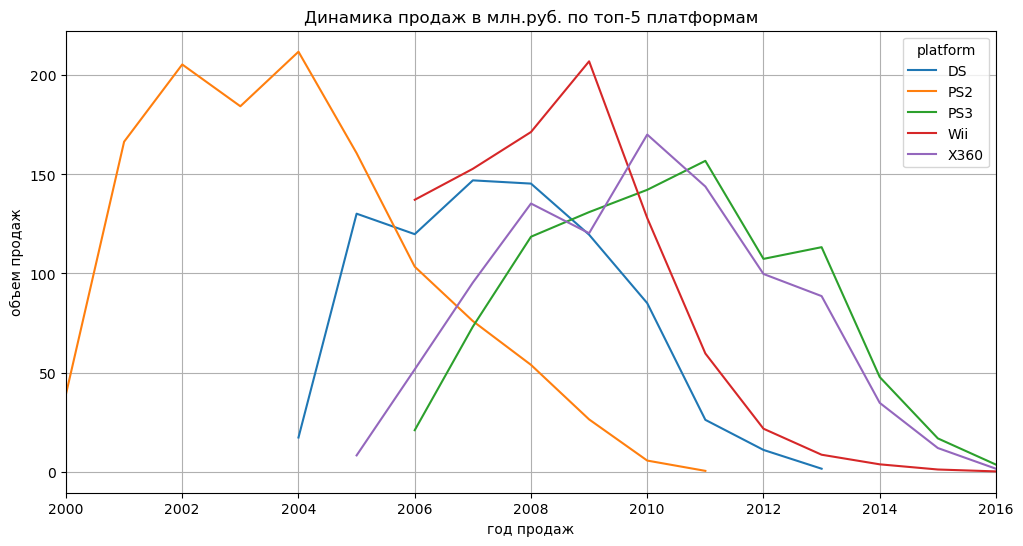

In [34]:
top.plot(grid=True, figsize=(12, 6), title = 'Динамика продаж в млн.руб. по топ-5 платформам').set(
                                     xlabel = 'год продаж', ylabel = 'объем продаж');
plt.xlim(2000, 2016)

- Визуализируем результат по топам:

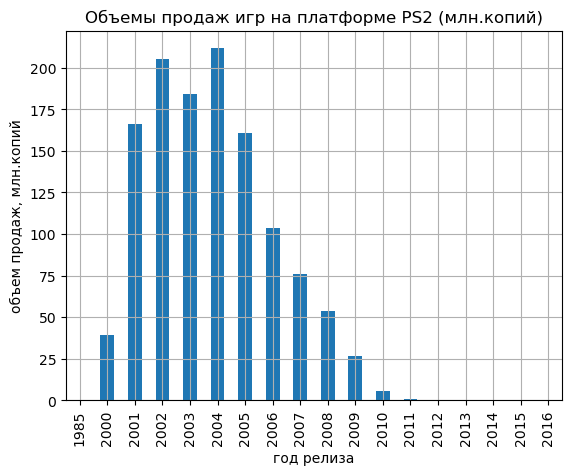

In [35]:
top['PS2'].plot.bar(
                    x = 'year_of_release', y = 'total_sales', grid=True, 
                    title='Объемы продаж игр на платформе PS2 (млн.копий)'
                    ).set(xlabel='год релиза', ylabel='объем продаж, млн.копий');

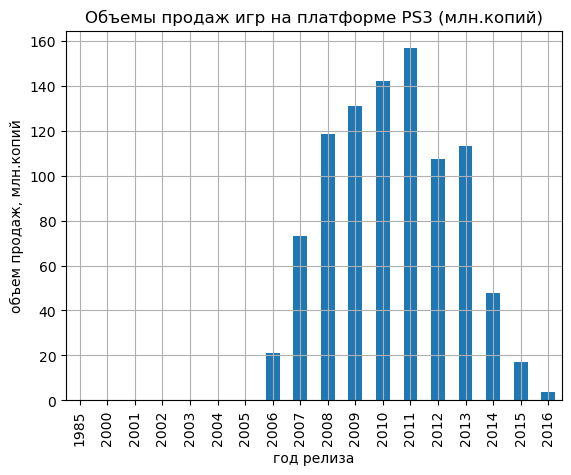

In [36]:
top['PS3'].plot.bar(
                    x = 'year_of_release', y = 'total_sales', grid=True, 
                    title='Объемы продаж игр на платформе PS3 (млн.копий)'
                    ).set(xlabel='год релиза', ylabel='объем продаж, млн.копий');

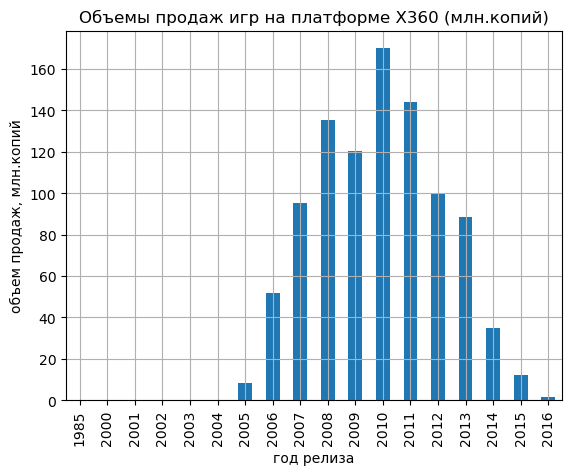

In [37]:
top['X360'].plot.bar(
                    x = 'year_of_release', y = 'total_sales', grid=True, 
                    title='Объемы продаж игр на платформе X360 (млн.копий)'
                    ).set(xlabel='год релиза', ylabel='объем продаж, млн.копий');

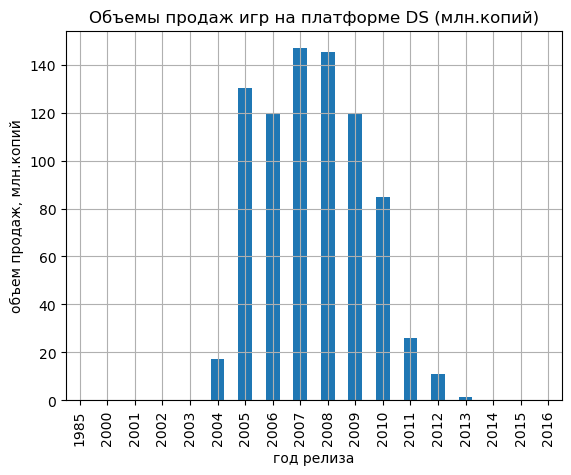

In [38]:
top['DS'].plot.bar(
                    x = 'year_of_release', y = 'total_sales', grid=True, 
                    title='Объемы продаж игр на платформе DS (млн.копий)'
                    ).set(xlabel='год релиза', ylabel='объем продаж, млн.копий');

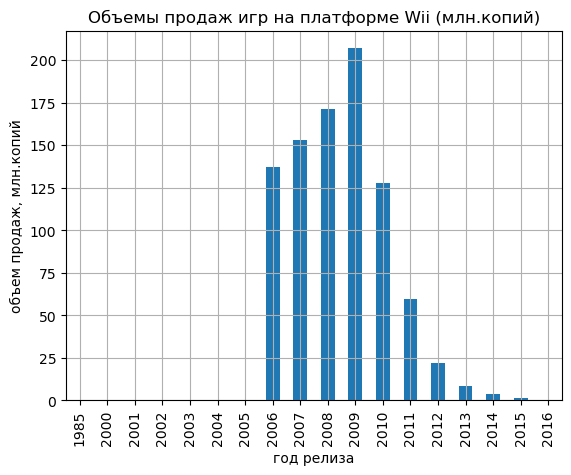

In [39]:
top['Wii'].plot.bar(
                    x = 'year_of_release', y = 'total_sales', grid=True, 
                    title='Объемы продаж игр на платформе Wii (млн.копий)'
                    ).set(xlabel='год релиза', ylabel='объем продаж, млн.копий');

Из графиков видно что в среднем на платформы существует спрос в течение 9-10 лет с пиком на 4-ом и 5-ом годах, далее спрос постепенно снижается.  
Можно сделать вывод что новые платформы набирают обороты в течение 2-3 лет, а старые начинают вымирать спустустя 5 лет после релиза. Поэтому для построения прогноза на 2017 год нам нужно рассматривать платформы с датой выхода не старше 2014 года.

- Построим график для актуального периода и найдем лидеров продаж:

In [40]:
data_actual = data.query('year_of_release >= 2014')
data_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.00,4.30,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98


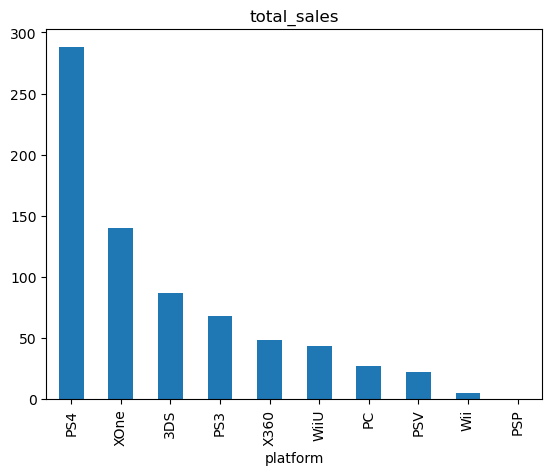

In [70]:
data_actual.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot.bar(subplots=True);

Видим что в лидерах новые поколения платформ - PS4 и XOne, а старые поколения теряют объёмы продаж. Рассморим несколько платформ-лидеров по отдельности

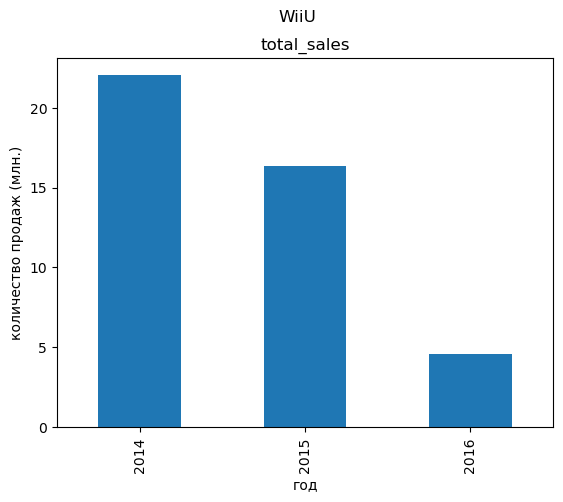

In [69]:
data_actual[data_actual['platform'] == 'WiiU'].groupby('year_of_release')['total_sales'].sum().plot.bar(subplots=True, title='WiiU', \
                                            xlabel='год', ylabel='количество продаж (млн.)');

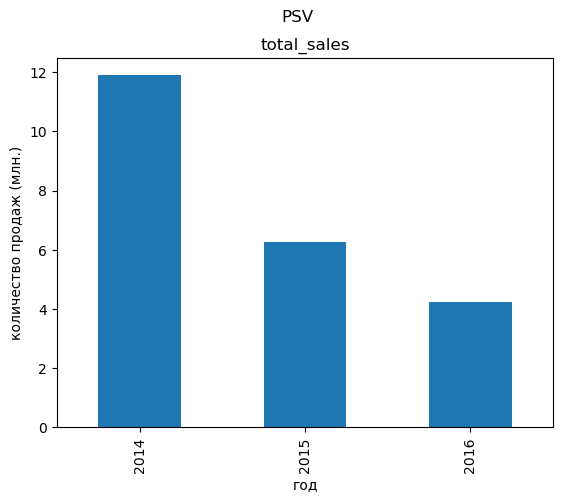

In [71]:
data_actual[data_actual['platform'] == 'PSV'].groupby('year_of_release')['total_sales'].sum().plot.bar(subplots=True, title='PSV', \
                                            xlabel='год', ylabel='количество продаж (млн.)');

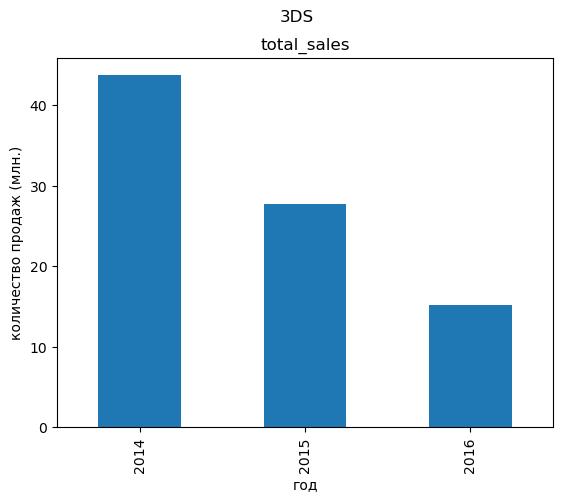

In [72]:
data_actual[data_actual['platform'] == '3DS'].groupby('year_of_release')['total_sales'].sum().plot.bar(subplots=True, title='3DS', \
                                            xlabel='год', ylabel='количество продаж (млн.)');

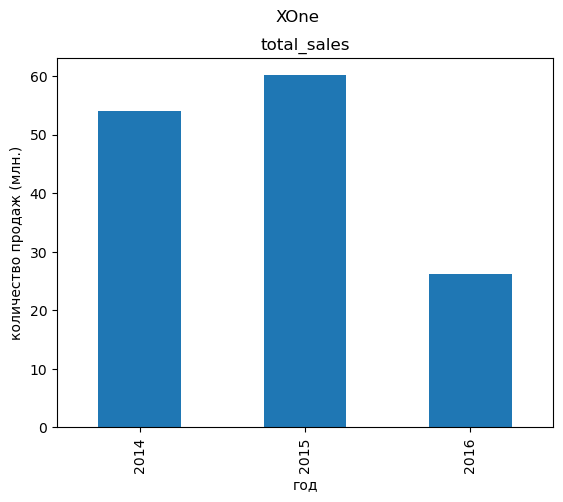

In [73]:
data_actual[data_actual['platform'] == 'XOne'].groupby('year_of_release')['total_sales'].sum().plot.bar(subplots=True, title='XOne', \
                                            xlabel='год', ylabel='количество продаж (млн.)');

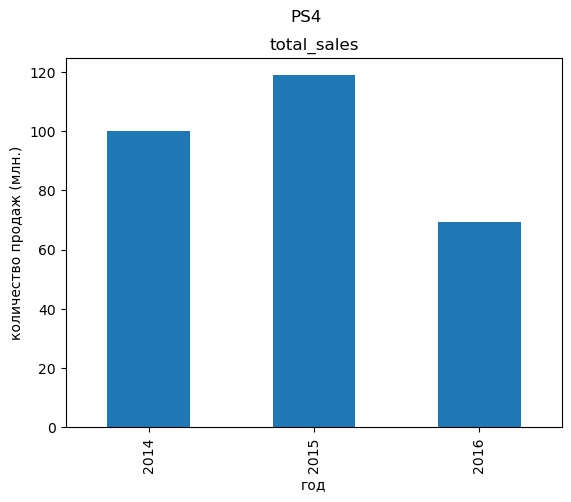

In [74]:
data_actual[data_actual['platform'] == 'PS4'].groupby('year_of_release')['total_sales'].sum().plot.bar(subplots=True, title='PS4', \
                                            xlabel='год', ylabel='количество продаж (млн.)');

Явные лидеры это PS4 и XOne, видим рост продаж после 2014. 

- Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

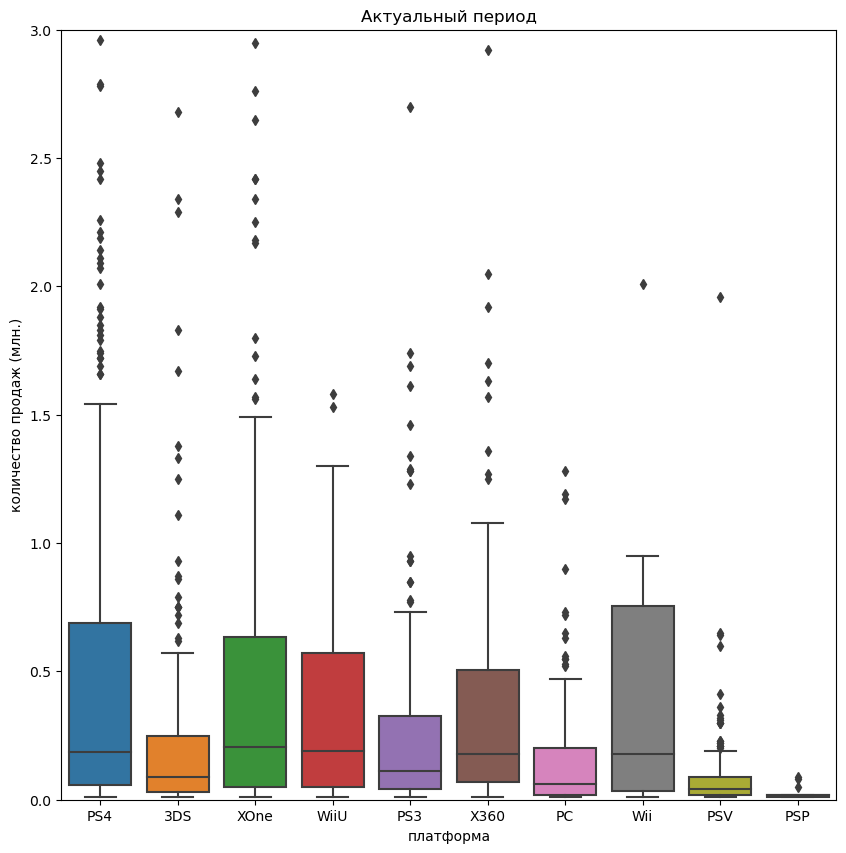

In [47]:
plt.figure(figsize=(10,10))
sns.boxplot(x='platform', y='total_sales', data=data_actual)
plt.xlabel('платформа')
plt.ylabel('количество продаж (млн.)')
plt.title('Актуальный период')
plt.ylim([0, 3]);

На диаграмме размаха видим большое количество точек - это особо популярные игры, но они лежат за пределами "усов" и не относятнся к нормальным значениям, их считаем выбросами.  
Заметные на гистограмме нюансы распределения хорошо бы зафиксировать в числах: 

In [48]:
data_actual.groupby('platform')['total_sales'].describe().sort_values(by='50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
XOne,228.00,0.62,1.05,0.01,0.05,0.20,0.63,7.39
WiiU,73.00,0.59,1.16,0.01,0.05,0.19,0.57,7.09
PS4,376.00,0.77,1.61,0.01,0.06,0.18,0.69,14.63
Wii,11.00,0.46,0.63,0.01,0.04,0.18,0.76,2.01
X360,111.00,0.43,0.63,0.01,0.07,0.18,0.51,4.28
PS3,219.00,0.31,0.63,0.01,0.04,0.11,0.33,5.27
3DS,212.00,0.41,1.19,0.01,0.03,0.09,0.25,11.68
PC,151.00,0.18,0.33,0.01,0.02,0.06,0.20,3.05
PSV,295.00,0.08,0.14,0.01,0.02,0.04,0.09,1.96


Можно выделить самого крупного игрока и это PS4 c самым большим количеством игр, на 2-м месте идёт его конкурент XOne. Однако рассматривая медианные значения, можно выделить так же лидеров по продажам по мимо PS4 и XOne, к ним относим X360, WiiU, Wii.

- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

Мы определились с лидером - это PS4 рассмотрим его подробнее. Узнаем как влияют оценки критиков и пользователей на продажи.

Построим диаграммы рассеивания

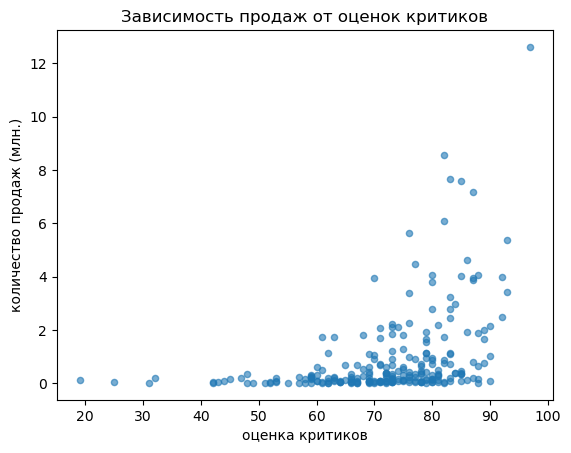

In [49]:
data_actual[data_actual['platform'] == 'PS4'].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.6, title='Зависимость продаж от оценок критиков', \
                                            xlabel='оценка критиков', ylabel='количество продаж (млн.)'); 

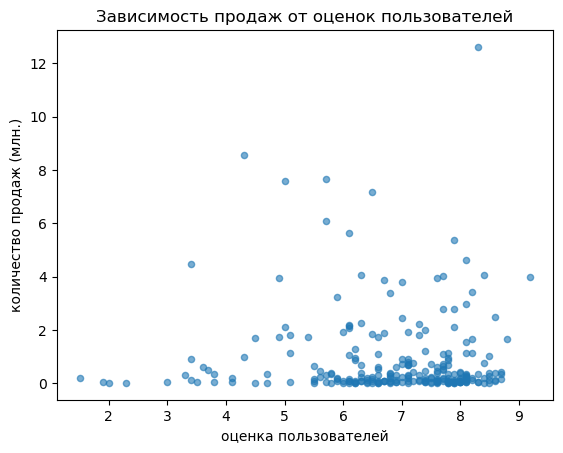

In [50]:
data_actual[data_actual['platform'] == 'PS4'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.6, title='Зависимость продаж от оценок пользователей', \
                                            xlabel='оценка пользователей', ylabel='количество продаж (млн.)'); 

Соствим матрицу корреляций:

In [51]:
corr_data_PS4 = data_actual[data_actual['platform'] == 'PS4'][['user_score', 'critic_score', 'total_sales']] 

In [52]:
corr_data_PS4.corr()

,user_score,critic_score,total_sales
user_score,1.00,0.55,-0.04
critic_score,0.55,1.00,0.40
total_sales,-0.04,0.40,1.00


Количество продаж имеет небольшую зависимость от оценок критиков и абсолютно не зависит от оценок пользователей.

- Соотнесём выводы о продаж игр на PS4 с продажами игр на других платформах

In [53]:
corr_data_other = data_actual[data_actual['platform'] != 'PS4'][['user_score', 'critic_score', 'total_sales']] 

In [54]:
corr_data_other.corr()

,user_score,critic_score,total_sales
user_score,1.00,0.49,-0.02
critic_score,0.49,1.00,0.31
total_sales,-0.02,0.31,1.00


Аналогичная ситуация с зависимостью продаж от оценок на остальных платформах.

- Посмотрим на общее распределение игр по жанрам.  Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

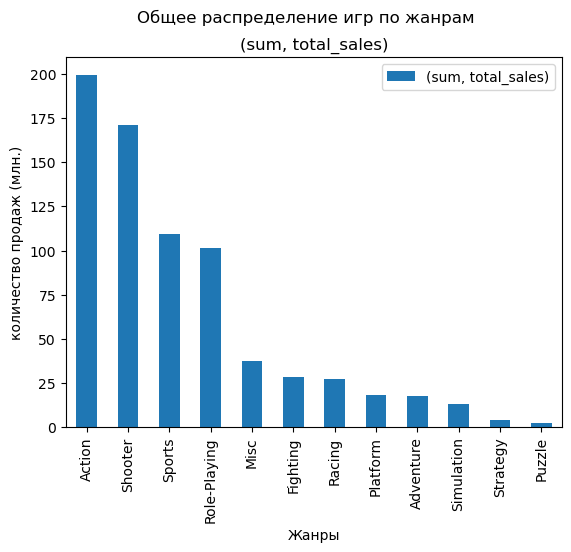

In [75]:
data_actual.pivot_table(index='genre', \
values='total_sales', aggfunc=['sum']).sort_values(('sum', 'total_sales'), ascending=False).plot.bar(subplots=True, \
                                xlabel='Жанры', ylabel='количество продаж (млн.)', title='Общее распределение игр по жанрам');


Самый продаваемый жанр - Action, Shooter на 2-м месте. Однако общие продажи - плохая метрика для поиска наиболее прибыльного жанра. За высокими показателями общих продаж может скрываться множество мелких игр с низкими продажами. Или 2-3 звезды и куча провалов. Лучше найти жанр, где игры стабильно приносят высокий доход - для этого стоит рассмотреть средние или медианные продажи. Лучше всего нам это покажет boxplot:

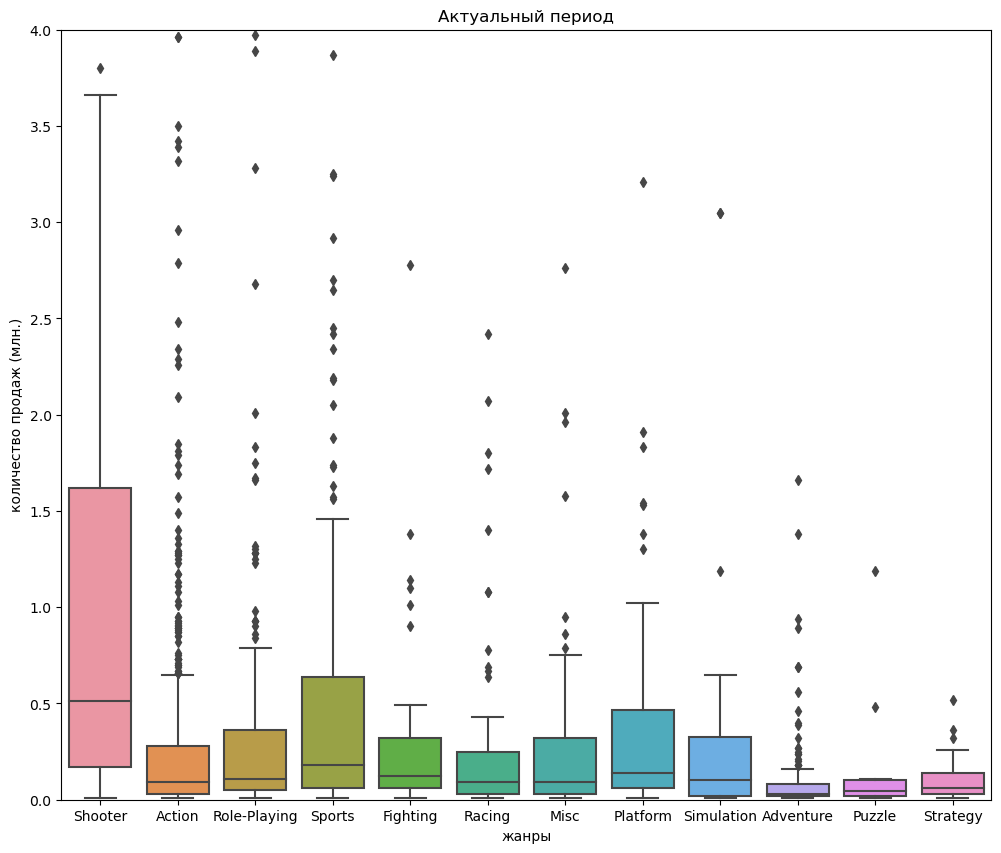

In [56]:
plt.figure(figsize=(12,10))
sns.boxplot(x='genre', y='total_sales', data=data_actual.sort_values('total_sales', ascending=False))
plt.xlabel('жанры')
plt.ylabel('количество продаж (млн.)')
plt.title('Актуальный период')
plt.ylim([0, 4]);

Теперь видим, что Shooter лидирует по средним продажам в сравнении с остальными жанрами, что нельзя сказать про Action. Так же заметим, что интеллектуальные игры и не пользуются большой популярностью, и средние продажи и общие продажи находятся в самом низу.

# Вывод
1. Больше всего люди покупают игры на платформах PS и Xbox.
2. Новые поколения пришли на смену старым поколениям.
3. В среднем поколение платформ живёт около 8-10 лет.
4. Наблюдатся общий спад продаж на игры.
5. Пик продаж происходит на 4-5 год поколения.
6. Оценки пользователей никак не влияют на покупку игр, но вот мнение критиков имеет небольшое значение.
7. Людям неинтересны интеллектуальные игры, большинство людей предпочитает шутер или экшн.


### Составим портрет пользователя каждого региона

- Определим для пользователя каждого региона (NA, EU, JP):  
Самые популярные платформы (топ-5). Опишим различия в долях продаж.

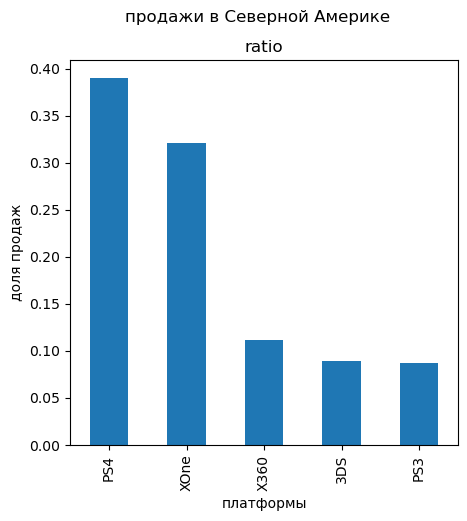

In [57]:
top_platform_na = data_actual.pivot_table(index='platform', \
values='na_sales', aggfunc=['sum']).sort_values(('sum', 'na_sales'), ascending=False).head()
top_platform_na['ratio'] = top_platform_na['sum', 'na_sales'] / top_platform_na['sum', 'na_sales'].sum()
top_platform_na['ratio'].plot.bar(subplots=True, figsize=(5, 5), \
                                xlabel='платформы', ylabel='доля продаж', title='продажи в Северной Америке');

В Северной Америке преобладает PS4 и практически рядом XOne. Посмотрим теперь, что происходит в Европе.

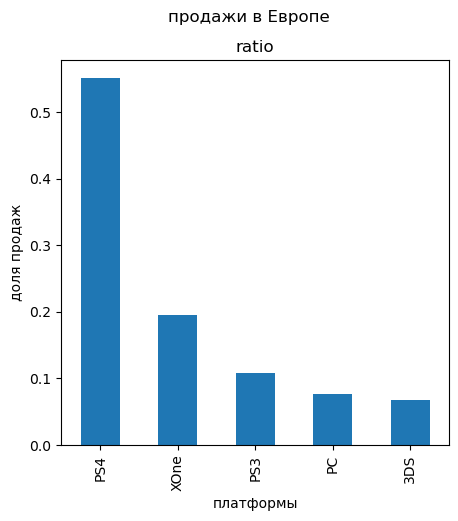

In [58]:
top_platform_eu = data_actual.pivot_table(index='platform', \
values='eu_sales', aggfunc=['sum']).sort_values(('sum', 'eu_sales'), ascending=False).head()
top_platform_eu['ratio'] = top_platform_eu['sum', 'eu_sales'] / top_platform_eu['sum', 'eu_sales'].sum()
top_platform_eu['ratio'].plot.bar(subplots=True, figsize=(5, 5), \
                                xlabel='платформы', ylabel='доля продаж', title='продажи в Европе');

В Европе c огромным отрывом в доле продаж 1-е место занимает PS4, далее ХOne и все остальные. Посмотрим что в Японии.

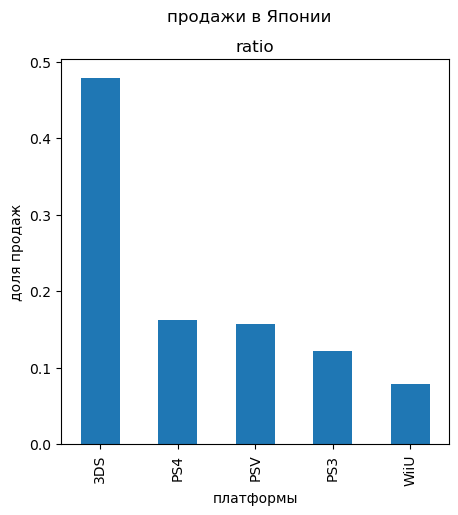

In [59]:
top_platform_jp = data_actual.pivot_table(index='platform', \
values='jp_sales', aggfunc=['sum']).sort_values(('sum', 'jp_sales'), ascending=False).head()
top_platform_jp['ratio'] = top_platform_jp['sum', 'jp_sales'] / top_platform_jp['sum', 'jp_sales'].sum()
top_platform_jp['ratio'].plot.bar(subplots=True, figsize=(5, 5), \
                                xlabel='платформы', ylabel='доля продаж', title='продажи в Японии');

В Японии в ТОП-5 присутствуют платформы тоько японских производителей. На первом месте c большим отрывом расположилась 3DS.

- Определим ТОП-5 жанров для каждого региона:

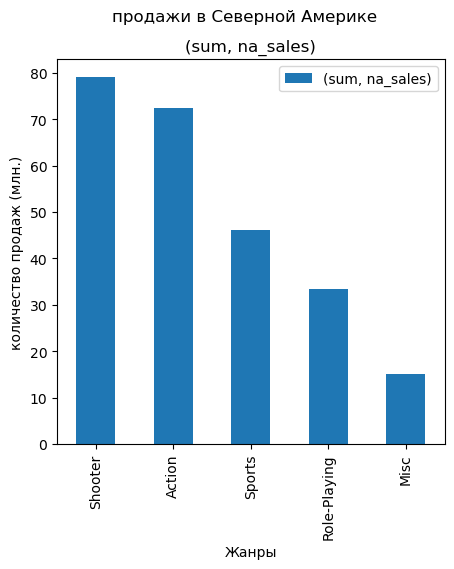

In [60]:
data_actual.pivot_table(index='genre', \
values='na_sales', aggfunc=['sum']).sort_values(('sum', 'na_sales'), ascending=False).head().plot.bar(subplots=True, figsize=(5, 5), \
                                xlabel='Жанры', ylabel='количество продаж (млн.)', title='продажи в Северной Америке');

В Северной Америки популярны жанры шутер, экшн на 2-м месте и спорт на 3-м.

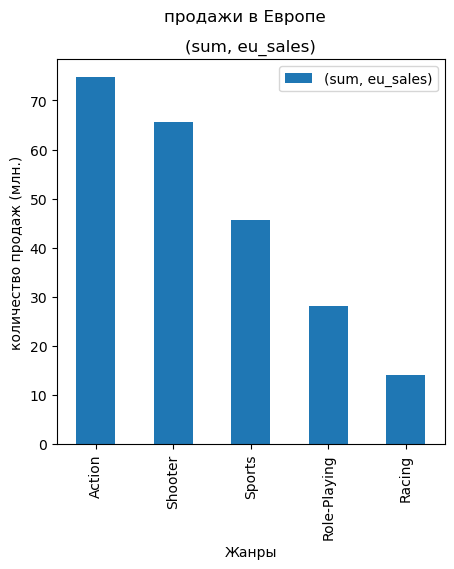

In [61]:
data_actual.pivot_table(index='genre', \
values='eu_sales', aggfunc=['sum']).sort_values(('sum', 'eu_sales'), ascending=False).head().plot.bar(subplots=True, figsize=(5, 5), \
                                xlabel='Жанры', ylabel='количество продаж (млн.)', title='продажи в Европе');

В Европе ситуация аналогична, экшн и шутер поменялись местами

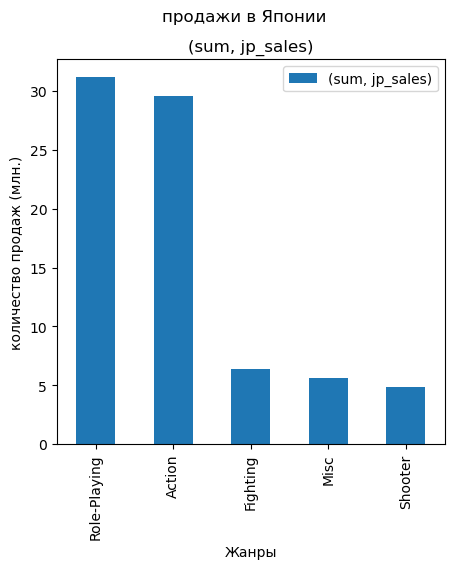

In [62]:
data_actual.pivot_table(index='genre', \
values='jp_sales', aggfunc=['sum']).sort_values(('sum', 'jp_sales'), ascending=False).head().plot.bar(subplots=True, figsize=(5, 5), \
                                xlabel='Жанры', ylabel='количество продаж (млн.)', title='продажи в Японии');

в Японие картина другая, на 1-м месте ролевые игры далее экшн. Шутеры в отличие от остальных регионов оказались в конце рейтинга.

- Теперь определим влияет ли рейтинг ESRB на продажи в отдельном регионе

In [63]:
data_actual['rating'].value_counts()

unknown    749
T          271
M          265
E          219
E10+       185
Name: rating, dtype: int64

Из открытых источников:  
Т - Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия. Примеры: Fortnite, Sims 4.  
М - Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Е Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. Примеры: Ark: Survival Evolved, Destiny 2.  
Е - Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. Примеры: Просто таннцуй, FIFA.  
Е 10+ - Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. Примеры: Minecraft Dungeons, Растения против зомби.  

Т. к. рейтинг ESRB предназначен для маркировки игр для США и Канады? логично, что для других регионов он не заполняется, там где он не указан мы заменили его заглушкой unknown.

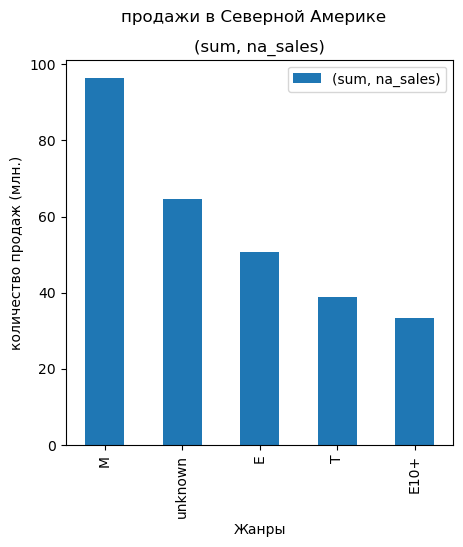

In [64]:
data_actual.pivot_table(index='rating', \
values='na_sales', aggfunc=['sum']).sort_values(('sum', 'na_sales'), ascending=False).head().plot.bar(subplots=True, figsize=(5, 5), \
                                xlabel='Жанры', ylabel='количество продаж (млн.)', title='продажи в Северной Америке');

В Америке наиболее популярны игры с возрастным ограничение 17+, далее игры без рейтинга и игры для всех.

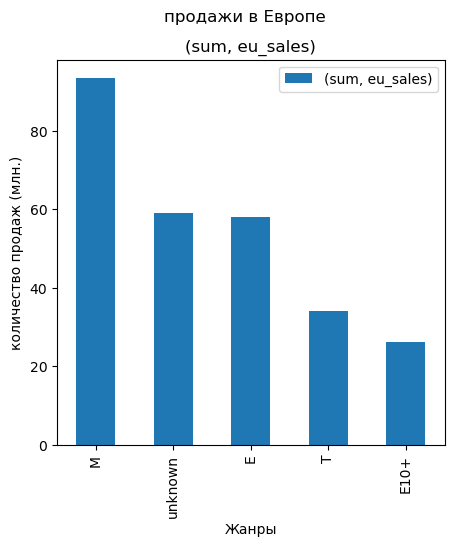

In [65]:
data_actual.pivot_table(index='rating', \
values='eu_sales', aggfunc=['sum']).sort_values(('sum', 'eu_sales'), ascending=False).head().plot.bar(subplots=True, figsize=(5, 5), \
                                xlabel='Жанры', ylabel='количество продаж (млн.)', title='продажи в Европе');

Аналогичная ситуация

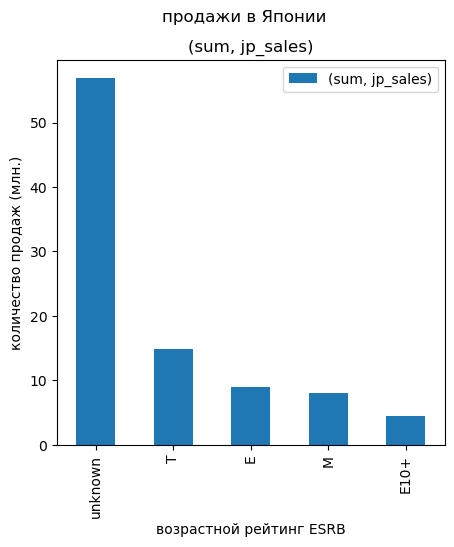

In [66]:
data_actual.pivot_table(index='rating', \
values='jp_sales', aggfunc=['sum']).sort_values(('sum', 'jp_sales'), ascending=False).head().plot.bar(subplots=True, figsize=(5, 5), \
                                xlabel='возрастной рейтинг ESRB', ylabel='количество продаж (млн.)', title='продажи в Японии');

В Японии преобладают игры без рейтинга ESRB, а значит там наиболее популярны локальные продукты. Далее игры возрастой группы старше 13 лет и игры для всех возрастов.

# Вывод  
Составим портрет пользователя каждого региона:  
1. Северная Америка:  
В Северной Америке преобладает игровые платформы PS4, XOne, X360, 3DS, PS3  
Популярны жанры Shooter, Action на 2-м месте, Sports на 3-м, далее Role-Playing и Misc.  
Игры с возрастным ограничение 17+, игры для всех, игры от 13 лет, от 10 лет.
2. Европа:  
Самые популярные игровые платформы PS4, XOne, далее PS3, PC,  и 3DS на последнем месте.  
Самые популярные жанры в Европе  Action, Shooter, Sports, Role-Playing и Racing  
Возрастной рейтинг игр от 17 лет на 1-м месте, игры для всех, игры от 13 лет и от 10 лет на последнем.
3. Япония:  
В Японии преобладает игровые платформы  3DS, PS4, PSV, PS3 и WiiU  
Самые популярные жанры Role-Playing, Action на 2-м месте, Fighting, Misc и Shooter на последнем.  
Возрастной рейтинг игр по убыванию: игры от 13 лет, игры для всех, игры от 17 лет и игры от 10 лет.


###  Провека гипотез

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
Сформулируем первую гипотезу:  
H_0: Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
H_1: - Альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC различаются.   
alpha = 0.05  
Проведём t- test

In [67]:
Xbox = data_actual[data_actual['platform'] == 'XOne']['user_score'].dropna()
PC = data_actual[data_actual['platform'] == 'PC']['user_score'].dropna()

results = st.ttest_ind(Xbox, PC, equal_var= True) #вызов метода для проверки гипотезы

alpha = 0.05 #задаём значение уровня значимости

print('p-значение:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


 t - тест нам показал, что мы не можем отвергнуть нулевую гипотезу, следовательно средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.  
Сформулируем вторую гипотезу:  
H_0: Нулевая гипотеза - Средние пользовательские рейтинги жанров Action и Sports одинаковые.  
H_1: - Альтернативная гипотеза - Средние пользовательские рейтинги жанров Action  и Sports разные.   
alpha = 0.05  
Проведём t- test

In [68]:
Action = data_actual[data_actual['genre'] == 'Action']['user_score'].dropna()
Sports = data_actual[data_actual['genre'] == 'Sports']['user_score'].dropna()

results = st.ttest_ind(Action, Sports, equal_var= True) #вызов метода для проверки гипотезы

alpha = 0.05 #задаём значение уровня значимости

print('p-значение:', results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Т - тест нам показал, что мы можем отвергнуть нулевую гипотезу, следовательно Средние пользовательские рейтинги жанров Action и Sports разные.

###  Oбщий вывод

Подведём итоги проделанной нами работой и сделаем вывод, что:

- Объём рынка по продажам игр упал в 2012 году .

- Больше всего люди покупают игры на платформах семейства PS4 или XOne.

- В среднем поколение платформ живёт около 8-10 лет.

- Пик продаж происходит на 4-5 год поколения.

- Оценки пользователей никак не влияют на покупку игр, но вот мнение критиков имеет небольшой вес.

- Людям неинтересны интеллектуальные игры, большинство людей предпочитает или экшн, или шутер.

портрет пользователя:

для Северной Америки:  
В Северной Америке преобладает игровые платформы PS4, XOne, X360, 3DS, PS3  
Популярны жанры Shooter, Action на 2-м месте, Sports на 3-м, далее Role-Playing и Misc.  
Пользователи предпочитают игры с возрастным ограничение 17+, игры для всех, игры от 13 лет, от 10 лет.

для Европы:  
Самые популярные игровые платформы PS4, XOne, далее PS3, PC, и 3DS на последнем месте.  
Самые популярные жанры в Европе Action, Shooter, Sports, Role-Playing и Racing  
Предпочтительный возрастной рейтинг игр от 17 лет на 1-м месте, игры для всех, игры от 13 лет и от 10 лет на последнем.

для Японии:  
Япония самобытна, там люди предпочитают платформы произведенные внутри страны и локальные жанры игр.  
Преобладает игровые платформы 3DS, PS4, PSV, PS3 и WiiU  
Самые популярные жанры Role-Playing, Action на 2-м месте, Fighting, Misc и Shooter на последнем.  
Предпочтительный возрастной рейтинг по убыванию: игры от 13 лет, игры для всех, игры от 17 лет и игры от 10 лет.

- После проведенного анализа рынка для планирования рекламных компаний и ставок на потенциально популярный продукт можно вывести следующие рекомендации:  
Наиболее популярны будут игры на платформах PS4 или XOne. Среди жанров сделать приоритет на Action и Shooter и выбирать игры с возрастным рейтингом от 17 и старше. 
- Были проведены статистические t-тесты для проверки гипотез по сравнению пользовательских рейтингов платформ Xbox One и PC, а также жанров Action и Sports. Результаты тестов:  

Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.  

Средние пользовательские рейтинги жанров Action и Sports различаются.